<a href="https://colab.research.google.com/github/AlexanderNaupa/Higienopolis/blob/main/T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso: Populacao na america latina** 

Vamos explorar um conjunto de dados com datos geograficos e demograficos dos países do mundo, vamos focar a atencao na america latina, e no particular, no crescimento da populacao nas ultimas decadas. Queremos provar que: 1. A populacao no Uruguai nao aumentou nos ultimos 30 anos, 2. O país com maior territorio tem mais populacao. E finalmente, conhecer o país com menor populacao na america do sul.

 **Exploração Inicial dos Dados**



In [19]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt    #Primeiro importamos as librarias que a gnt precisa para trabalhar
 
url1 = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'  # endereco dos dados
df = pd.read_csv(url1, sep=";")
 #vamos dar uma olhada nos dados 
print('Cantidade de linhas e colunas no dataframe:',df.shape ) 
print('Nome das colunas, ou seja, das informacoes:',df.columns ) 
print(df.head(6))
# Como podemos verificar numa rápida inspeção abaixo, temos poucos dados, mas tudo bem, sao suficientes. Temos tambem dados ruims com valores NAN,
# vamos ter que tirar esses valores se for o caso de usar essas colunas para nao atrapalhar a nossa analise, tambem algumas colunas tem valores multiples.

Cantidade de linhas e colunas no dataframe: (252, 19)
Nome das colunas, ou seja, das informacoes: Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')
  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   
5      AL     ALB   28748.0            Tirana        EU           ALL   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          E

In [20]:
url2 = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
DF = pd.read_csv(url2)  # Para estudar o caso do Uruguai importamos um segundo dataframe com valores da populacao mundial ano por ano
print('Cantidade de linhas e colunas:',DF.shape )  # Revisamos tambem o tipo de dados nesse segundo dataframe
print('Nome das colunas:',DF.columns ) 
print(DF.head(5))
dfUru = DF[DF["country"] == 'Uruguay' ]   # Revisamos a informacao filtrando os dados e ficando só com dados do Uruguai
print(dfUru.head(6))


Cantidade de linhas e colunas: (1704, 3)
Nome das colunas: Index(['country', 'year', 'population'], dtype='object')
       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
      country  year  population
1620  Uruguay  1952     2252965
1621  Uruguay  1957     2424959
1622  Uruguay  1962     2598466
1623  Uruguay  1967     2748579
1624  Uruguay  1972     2829526
1625  Uruguay  1977     2873520


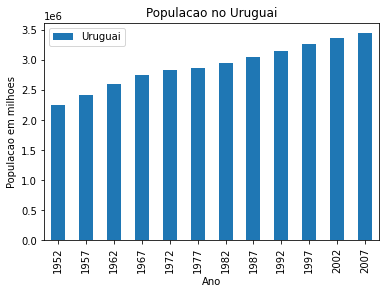

In [14]:
df_plot = pd.DataFrame({'Uruguai': dfUru['population'].values}, index = dfUru['year'].unique())
df_plot.plot(kind='bar')
plt.xlabel("Ano")
plt.ylabel("Populacao em milhoes")
plt.title('Populacao no Uruguai')
plt.show()
#Plotamos a evolucao da populacao do Uruguai segundo os dados do dataframe
#A partir do grafico obtido notamos que a população do Uruguai aumentou com uma taxa de crescimento cada vez mais lenta, mas aumentou.
# Isso aconteceu no intervalo de tempo estudado entre os anos de 1952 e 2007

In [16]:
df_americadosul = df.replace(np.nan, '', regex=True)
df_americadosul = df_americadosul[ df_americadosul['continent'].str.contains('SA') ]
df_americadosul
#Agora vamos a obter dados que procuramos sobre a populacao na america latina
#Nessa parte filtramos os dados do dataframe completo inicial, ficamos só com os dados da america do sul, quer dizer, com os paises presentes no continente SA

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
62,EC,ECU,283560.0,Quito,SA,USD,Dollar,,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
71,FK,FLK,12173.0,Stanley,SA,FKP,Pound,,FK,3474414,en-FK,Falkland Islands,,238,500,2638,,,.fk
79,GF,GUF,91000.0,Cayenne,SA,EUR,Euro,,FG,3381670,fr-GF,French Guiana,"SR,BR",254,594,195506,#####,^((97|98)3\d{2})$,.gf
93,GY,GUY,214970.0,Georgetown,SA,GYD,Dollar,,GY,3378535,en-GY,Guyana,"SR,BR,VE",328,592,748486,,,.gy
174,PE,PER,1285220.0,Lima,SA,PEN,Sol,,PE,3932488,"es-PE,qu,ay",Peru,"EC,CL,BO,BR,CO",604,51,29907003,,,.pe


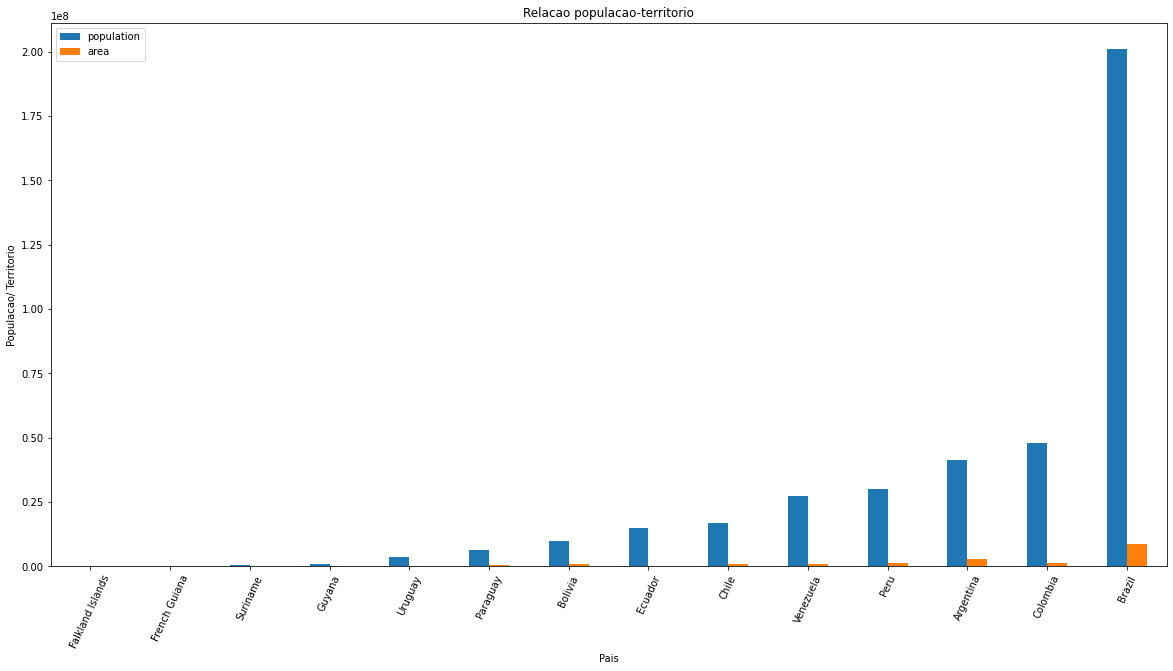

In [18]:
df_americadosul.set_index('name')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10)) #plotamos population de forma ascendente juntamente com a area
plt.xlabel("Pais")
plt.ylabel("Populacao/ Territorio")
plt.title('Relacao populacao (azul)-territorio(Laranja)')
plt.show()
#Para responder as nossas perguntas, aqui plotamos simultaneamente a populacao e o territorio de cada pais na america latina para observar graficamente a hipotese
# de maior territorio maior populacao. Porem, observamos no grafico que esa hipotese nao é verdadeira, vemos o contraexemplo, a Argentina tem quase
# o dobro de area (territorio) que a Colombia, mas tem menos populacao.
# Ao mesmo tempo observamos que o país com a menor populacao na america latina é a Guaiana francesa, já que a Falkland nao é pais, é uma ilha
# da inglaterra(Argentina)

**Conclusao:**

Como conclusao desse breve analise, obtemos que nossas hipoteses nao foram certas. A populacao do Uruguai sim aumentou nos ultimos 30 anos, contrariamente a o que é comentado sobre esse assunto. O país com maior área nao necesariamente tem maior populacao, vimos graficamente o contra exemplo da Argentina e a Colombia. E finalmente, conhecimos que a Guaiana francesa tem a menor populacao na america do sul.